# Downloads and Views over time
In this notebook, we summarize download statistics we are collecting for the Zenodo records in our database. The code for this was AI-generated.

In [1]:
import bia_bob

In [2]:
%%bob 
There is a folder "../download_statistics/" of CSV files which have a date as the filename, e.g. "20240628.csv".
Extract the date from the filename.
Open all those CSV files.
Summarize the CSV files by summing the columns "unique_downloads" and "unique_views".
Create a new DataFrame containing the date and the two summarized columns, with a row for each file.
Plot the downloads and views over the date using seaborn.

I will extract the date from filenames, read the CSV files, summarize the "unique_downloads" and "unique_views" columns, create a new DataFrame with these summaries, and plot the downloads and views over the date using seaborn.



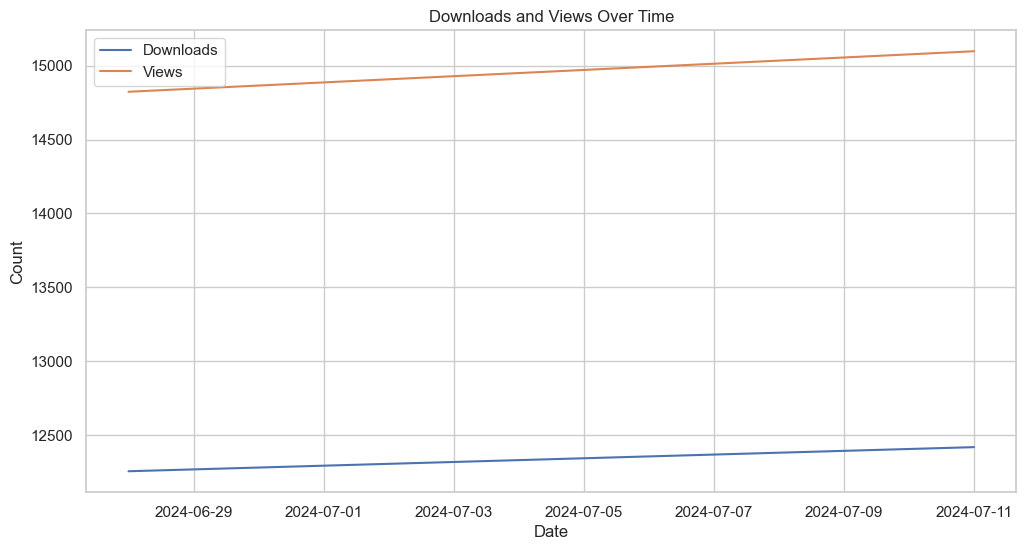

In [3]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. List all CSV files in the folder
folder_path = "../download_statistics/"
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Initialize lists to store data
dates = []
downloads = []
views = []

# 2. Extract date and process each file
for file in csv_files:
    # Extract date from filename
    date_str = file.replace('.csv', '')
    date = pd.to_datetime(date_str, format='%Y%m%d')
    
    # 3. Read the CSV file
    df = pd.read_csv(os.path.join(folder_path, file))
    
    # Summarize the columns
    total_downloads = df['unique_downloads'].sum()
    total_views = df['unique_views'].sum()
    
    # Append to lists
    dates.append(date)
    downloads.append(total_downloads)
    views.append(total_views)

# 4. Create a new DataFrame
summary_df = pd.DataFrame({
    'date': dates,
    'total_downloads': downloads,
    'total_views': views
})

# 5. Plot the data using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='total_downloads', data=summary_df, label='Downloads')
sns.lineplot(x='date', y='total_views', data=summary_df, label='Views')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Downloads and Views Over Time')
plt.legend()
plt.show()